<a href="https://colab.research.google.com/github/comojin1994/Deep_Learning_Study/blob/master/Tensorflow/Remind/Remind_image_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0

In [0]:
import tensorflow as tf
import numpy as np
print(tf.__version__)
from tensorflow.keras import layers, datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

2.0.0


In [0]:
# Hyperparameter
num_epochs = 10
batch_size = 32
learning_rate = 0.001
dropout_rate = 0.25
input_shape = (28, 28, 1)
num_classess = 10

loss_ftn = tf.keras.losses.sparse_categorical_crossentropy
# loss_ftn = tf.keras.losses.categorical_crossentropy
metrics = ['accuracy']
optm = tf.keras.optimizers.Adam(learning_rate)

In [0]:
# Model
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, 3, 1, 'SAME', activation='relu')(inputs)
net = layers.Conv2D(32, 3, 1, 'SAME', activation='relu')(net)
net = layers.MaxPool2D(2)(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Conv2D(64, 3, 1, 'SAME', activation='relu')(net)
net = layers.Conv2D(64, 3, 1, 'SAME', activation='relu')(net)
net = layers.MaxPool2D(2)(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')
model.compile(optimizer=optm, loss=loss_ftn, metrics=metrics)
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        36

In [0]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]
# train_y = to_categorical(train_y, num_classess)
# test_y = to_categorical(test_y, num_classess)

In [0]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [0]:

train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    width_shift_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255.)

In [0]:
'''
cnt = 0
for batch in train_datagen.flow(train_x, train_y, batch_size=batch_size):
  print(len(batch))
  cnt += 1
  if cnt == 10: break
'''

2
2
2
2
2
2
2
2
2
2


In [0]:
train_generator = train_datagen.flow(train_x, train_y, batch_size=batch_size)
test_generator = test_datagen.flow(test_x, test_y, batch_size=batch_size)

In [0]:
hist = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator),)

Train for 1875 steps, validate for 313 steps
Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3259 - accuracy: 0.8951 - val_loss: 0.1013 - val_accuracy: 0.9680
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1293 - accuracy: 0.9601 - val_loss: 0.0599 - val_accuracy: 0.9808
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1039 - accuracy: 0.9668 - val_loss: 0.0690 - val_accuracy: 0.9782
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0919 - accuracy: 0.9712 - val_loss: 0.0795 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0844 - accuracy: 0.9734 - val_loss: 0.0454 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0795 - accuracy: 0.9750 - val_loss: 0.0397 - val_accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0

In [0]:
hist.history

{'accuracy': [0.8950667,
  0.9600833,
  0.96676666,
  0.9711667,
  0.9734167,
  0.97495,
  0.9758,
  0.97715,
  0.97908336,
  0.9791],
 'loss': [0.3259428605894248,
  0.1292954805529366,
  0.10391663152578597,
  0.09188552777403966,
  0.08441707810928735,
  0.07952851173030212,
  0.07469919977509416,
  0.06967088371325905,
  0.06610877854904004,
  0.06504429949360589],
 'val_accuracy': [0.968,
  0.9808,
  0.9782,
  0.9753,
  0.9836,
  0.9862,
  0.9867,
  0.9877,
  0.9852,
  0.9868],
 'val_loss': [0.10128218160061457,
  0.05985340558484527,
  0.06902396215698278,
  0.07953756334039828,
  0.04542062554144696,
  0.03970937117587957,
  0.04173805356498424,
  0.0388486457776571,
  0.045496324966542614,
  0.044971120049849676]}

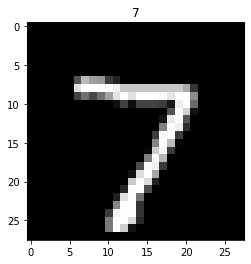

In [0]:
pred = model.predict(tf.cast(test_x[0:1,:,:,:], dtype=tf.float32))
pred = tf.argmax(pred, axis=1)
pred

plt.title(pred.numpy()[0])
plt.imshow(test_x[0, :, :, 0], 'gray')
plt.show()